In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your dataset path
dataset_path = 'F:/BE_Practicals_sem_VII/food-101/food-101/images'

# Define parameters
input_shape = (224, 224, 3)  # adjust based on your dataset
batch_size = 32
epochs = 5

# Create data generators

# A shear range of 0.2 means that during the image augmentation process, the shear transformation will be applied with a 
# maximum intensity of 0.2. This value is a fraction of the image dimension. In practical terms, it means that each point 
# in the image can be shifted by up to 20% of the image's width or height.

#  A zoom range of 0.2 means that the images can be zoomed in by up to 20%.

# One-hot encoding converts integer labels into binary vectors

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # set the validation split
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',  # adjust for binary or multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [2]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(101, activation='softmax'))  # adjust based on the number of classes in your dataset



In [3]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
H = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/5
2525/2525 [==============================] - 13286s 5s/step - loss: 4.9060 - accuracy: 0.0090 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 2/5
2525/2525 [==============================] - 5669s 2s/step - loss: 4.6159 - accuracy: 0.0090 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 3/5
2525/2525 [==============================] - 4102s 2s/step - loss: 4.6158 - accuracy: 0.0088 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 4/5
2525/2525 [==============================] - 4216s 2s/step - loss: 4.6159 - accuracy: 0.0093 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 5/5
2525/2525 [==============================] - 4957s 2s/step - loss: 4.6158 - accuracy: 0.0094 - val_loss: 4.6152 - val_accuracy: 0.0099


In [4]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to get class names from folder names
def get_class_names(dataset_path):
    return sorted(os.listdir(dataset_path))

# Function to get a random image path from the dataset
# os.walk function to traverse the directory tree rooted at dataset_path.  
# It iterates over all the directories, subdirectories, and files within that path.

def get_random_image_path(dataset_path):
    all_images = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".jpg"):
                all_images.append(os.path.join(root, file))
    
    random_image_path = random.choice(all_images)
    return random_image_path



In [5]:
# Get class names
class_names = get_class_names(dataset_path)

In [6]:
# Get a random image path
new_image_path = get_random_image_path(dataset_path)

In [7]:
# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

1/1 [==============================] - 0s 173ms/step
1
Predicted class: baby_back_ribs
Probability: 0.010135721


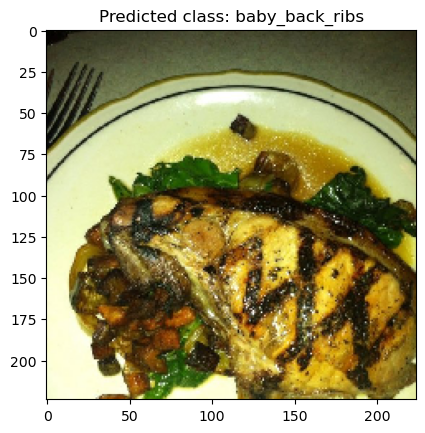

In [8]:
# Make prediction
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name and probability
print(predicted_class_index)
print("Predicted class:", predicted_class_name)
print("Probability:", predictions[0][predicted_class_index])

# Display the image and predicted class name
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

In [9]:
model.evaluate(validation_generator)

632/632 [==============================] - 249s 394ms/step - loss: 4.6152 - accuracy: 0.0099


[4.615189075469971, 0.009900989942252636]

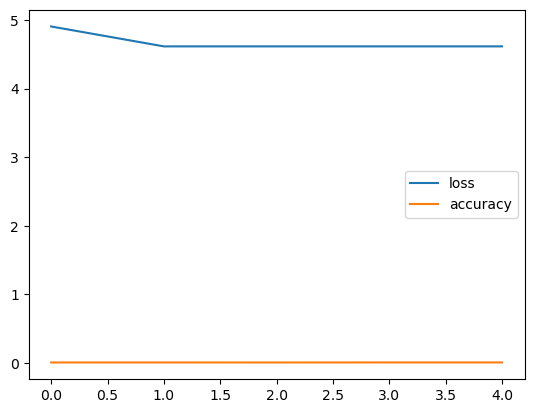

In [10]:
import matplotlib.pyplot as plt

plt.plot(H.history['loss'], label = 'loss')
plt.plot(H.history['accuracy'], label = 'accuracy')
plt.legend()